# 기말고사 해설

## imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp 

In [2]:
tnp.experimental_enable_numpy_behavior()

In [3]:
%load_ext tensorboard

In [4]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+ s + ';}')

## 1. Fashion_mnist, DNN (30점)

`(1)` `tf.keras.datasets.fashion_mnist.load_data()`을 이용하여 fashion_mnist 자료를 불러온 뒤 아래의 네트워크를 이용하여 적합하라. (6점)

- 평가지표로 accuracy를 이용할 것 
- epoch은 10으로 설정할 것 
- optimizer는 adam을 이용할 것 

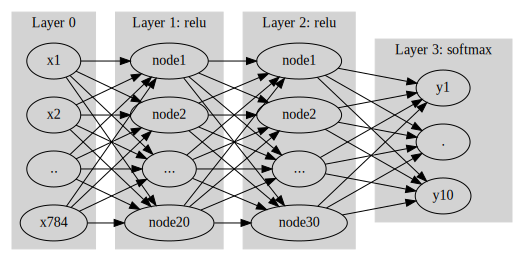

In [5]:
#collapse
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    "x784" -> "node1"
    
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node20"
    "x2" -> "node20"
    ".." -> "node20"
    "x784" -> "node20"


    label = "Layer 1: relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "node1" -> "node1 "
    "node2" -> "node1 "
    "..." -> "node1 "
    "node20" -> "node1 "
    
    "node1" -> "node2 "
    "node2" -> "node2 "
    "..." -> "node2 "
    "node20" -> "node2 "
    
    "node1" -> "... "
    "node2" -> "... "
    "..." -> "... "
    "node20" -> "... "

    "node1" -> "node30 "
    "node2" -> "node30 "
    "..." -> "node30 "
    "node20" -> "node30 "


    label = "Layer 2: relu"
}
subgraph cluster_4{
    style=filled;
    color=lightgrey;

    "node1 " -> "y10"
    "node2 " -> "y10"
    "... " -> "y10"
    "node30 " -> "y10"
    
    "node1 " -> "y1"
    "node2 " -> "y1"
    "... " -> "y1"
    "node30 " -> "y1"
    
    "node1 " -> "."
    "node2 " -> "."
    "... " -> "."
    "node30 " -> "."
    
    label = "Layer 3: softmax"
}
''')


(풀이)

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X = tf.constant(x_train.reshape(-1,28,28,1),dtype=tf.float64)
y = tf.keras.utils.to_categorical(y_train)
XX = tf.constant(x_test.reshape(-1,28,28,1),dtype=tf.float64)
yy = tf.keras.utils.to_categorical(y_test)

2022-06-21 13:22:45.132504: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [7]:
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(20,activation='relu'))
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')
net.fit(X,y,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 740us/step - loss: 1.5549 - accuracy: 0.5059
Epoch 2/10
1875/1875 [==============================] - 1s 722us/step - loss: 0.9540 - accuracy: 0.6122
Epoch 3/10
1875/1875 [==============================] - 1s 741us/step - loss: 0.9147 - accuracy: 0.6224
Epoch 4/10
1875/1875 [==============================] - 1s 740us/step - loss: 0.8895 - accuracy: 0.6273
Epoch 5/10
1875/1875 [==============================] - 1s 725us/step - loss: 0.8622 - accuracy: 0.6347
Epoch 6/10
1875/1875 [==============================] - 1s 735us/step - loss: 0.8717 - accuracy: 0.6344
Epoch 7/10
1875/1875 [==============================] - 1s 744us/step - loss: 0.8444 - accuracy: 0.6391
Epoch 8/10
1875/1875 [==============================] - 1s 734us/step - loss: 0.8603 - accuracy: 0.6388
Epoch 9/10
1875/1875 [==============================] - 1s 739us/step - loss: 0.8437 - accuracy: 0.6392
Epoch 10/10
1875/1875 [==============================] - 1s 736u

`(2)` (1)에서 적합된 네트워크를 이용하여 test data의 accuracy를 구하라. (6점)

(풀이)

In [8]:
net.evaluate(XX,yy) 

313/313 [==============================] - 0s 730us/step - loss: 0.8405 - accuracy: 0.6457


[0.8405390381813049, 0.6456999778747559]

`(3)` train set에서 20%의 자료를 validation 으로 분리하여 50에폭동안 학습하라. 텐서보드를 이용하여 train accuracy와 validation accuracy를 시각화 하고 결과를 해석하라. 오버피팅이라고 볼 수 있는가? (6점)

(풀이)

In [9]:
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(20,activation='relu'))
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')
cb1 = tf.keras.callbacks.TensorBoard()
net.fit(X,y,epochs=50,validation_split=0.2,callbacks=cb1,verbose=0)

In [10]:
#%tensorboard --logdir logs --host 0.0.0.0

> validation loss가 줄어들다가 증가한다면 오버피팅으로 판단한다. 그렇지 않으면 오버핏이 아니다. 

`(4)` (3)에서 적합된 네트워크를 이용하여 test data의 accuracy를 구하라. (2)의 결과와 비교하라. (6점)

(풀이)

In [11]:
net.evaluate(XX,yy)

313/313 [==============================] - 0s 884us/step - loss: 1.2193 - accuracy: 0.4664


[1.2193024158477783, 0.46639999747276306]

> accuracy가 상승함. 따라서 에폭을 늘린것이 유의미한 결정이라 볼 수 있다. 

`(5)` 조기종료기능을 이용하여 (3)의 네트워크를 다시 학습하라. 학습결과를 텐서보드를 이용하여 시각화 하라. (6점)
- patience=3 으로 설정할 것

(풀이)

In [12]:
!rm -rf logs
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(20,activation='relu'))
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')
cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=3)
net.fit(X,y,epochs=50,verbose=0,validation_split=0.2,callbacks=[cb1,cb2]) 
#%tensorboard --logdir logs --host 0.0.0.0

## 2. Fashion_mnist, CNN (30점)

`(1)` `tf.keras.datasets.fashion_mnist.load_data()`을 이용하여 fashion_mnist 자료를 불러온 뒤 아래의 네트워크를 이용하여 적합하라. (10점)

- 이때 n1=6, n2=16, n3=120 으로 설정한다, 드랍아웃비율은 20%로 설정한다.
- `net.summary()`를 출력하여 설계결과를 확인하라.

![](https://editor.analyticsvidhya.com/uploads/90650dnn2.jpeg)

(풀이)

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [14]:
X = tf.constant(x_train.reshape(-1,28,28,1),dtype=tf.float64)
y = tf.keras.utils.to_categorical(y_train)
XX = tf.constant(x_test.reshape(-1,28,28,1),dtype=tf.float64)
yy = tf.keras.utils.to_categorical(y_test)

In [15]:
net = tf.keras.Sequential()
net.add(tf.keras.layers.Conv2D(6,(5,5),activation='relu')) # activation이 relu임은 그림에서 명시되지 않았으므로 생략해도 무방함. 
net.add(tf.keras.layers.MaxPool2D())
net.add(tf.keras.layers.Conv2D(16,(5,5),activation='relu')) # activation이 relu임은 그림에서 명시되지 않았으므로 생략해도 무방함. 
net.add(tf.keras.layers.MaxPool2D())
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(120,activation='relu'))
net.add(tf.keras.layers.Dropout(0.2))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')
net.fit(X,y,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 1ms/step - loss: 0.8601 - accuracy: 0.7537
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4388 - accuracy: 0.8412
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3892 - accuracy: 0.8596
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3642 - accuracy: 0.8665
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3437 - accuracy: 0.8739


In [16]:
net.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (32, 24, 24, 6)           156       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 12, 12, 6)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 8, 8, 16)            2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 4, 4, 16)           0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (32, 256)                 0         
                                                                 
 dense_9 (Dense)             (32, 120)                

`(2)` n1=(6,64,128), n2=(16,256)에 대하여 test set의 loss가 최소화되는 조합을 찾아라. 결과를 텐서보드로 시각화하는 코드를 작성하라. (20점)
- epoc은 3회로 한정한다. 
- validation_split은 0.2로 설정한다. 

(풀이)

In [17]:
from tensorboard.plugins.hparams import api as hp

In [18]:
!rm -rf logs

In [19]:
for n1 in [6,64,128]: 
    for n2 in [16,256]: 
        logdir = 'logs/hp_{}_{}'.format(n1,n2)
        with tf.summary.create_file_writer(logdir).as_default():
            net = tf.keras.Sequential()
            net.add(tf.keras.layers.Conv2D(n1,(5,5),activation='relu'))
            net.add(tf.keras.layers.MaxPool2D())
            net.add(tf.keras.layers.Conv2D(n2,(5,5),activation='relu'))
            net.add(tf.keras.layers.MaxPool2D())
            net.add(tf.keras.layers.Flatten())
            net.add(tf.keras.layers.Dense(120,activation='relu'))
            net.add(tf.keras.layers.Dropout(0.2))
            net.add(tf.keras.layers.Dense(10,activation='softmax'))
            net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')
            cb3 = hp.KerasCallback(logdir, {'n1':n1, 'n2':n2})
            net.fit(X,y,epochs=3,validation_split=0.2,callbacks=cb3)
            tf.summary.scalar('loss(테스트셋)',net.evaluate(XX,yy)[0], step=1) 

Epoch 1/3
1500/1500 [==============================] - 2s 1ms/step - loss: 0.9984 - accuracy: 0.6880 - val_loss: 0.5805 - val_accuracy: 0.7720
Epoch 2/3
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5349 - accuracy: 0.8008 - val_loss: 0.4375 - val_accuracy: 0.8393
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.4230 - accuracy: 0.8421
Epoch 1/3
1500/1500 [==============================] - 2s 2ms/step - loss: 0.8688 - accuracy: 0.7790 - val_loss: 0.3846 - val_accuracy: 0.8619
Epoch 2/3
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4005 - accuracy: 0.8566 - val_loss: 0.3601 - val_accuracy: 0.8673
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.3782 - accuracy: 0.8665
Epoch 1/3
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0166 - accuracy: 0.6389 - val_loss: 0.5612 - val_accuracy: 0.7935
Epoch 2/3
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4938 - acc

In [20]:
#%tensorboard --logdir logs --host 0.0.0.0

## 3. CIFAR10 (30점)

`tf.keras.datasets.cifar10.load_data()`을 이용하여 CIFAR10을 불러온 뒤 적당한 네트워크를 사용하여 적합하라. 

- 결과를 텐서보드로 시각화할 필요는 없다. 
- 자유롭게 모형을 설계하여 적합하라. 
- test set의 accuracy가 70%이상인 경우만 정답으로 인정한다. 

(풀이)

In [21]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
X=x_train.reshape(-1,32,32,3)/255 
y=tf.keras.utils.to_categorical(y_train) 
XX=x_test.reshape(-1,32,32,3)/255
yy=tf.keras.utils.to_categorical(y_test)

In [25]:
net = tf.keras.Sequential()
net.add(tf.keras.layers.Conv2D(128,(2,2),activation='relu'))
net.add(tf.keras.layers.Conv2D(128,(2,2),activation='relu'))
net.add(tf.keras.layers.MaxPool2D())
net.add(tf.keras.layers.Conv2D(256,(2,2),activation='relu'))
net.add(tf.keras.layers.Conv2D(256,(2,2),activation='relu'))
net.add(tf.keras.layers.MaxPool2D())
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(256,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')
net.fit(X,y,epochs=5,validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 5s 3ms/step - loss: 1.4194 - accuracy: 0.4870 - val_loss: 1.2295 - val_accuracy: 0.5636
Epoch 2/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9424 - accuracy: 0.6697 - val_loss: 0.8725 - val_accuracy: 0.6981
Epoch 3/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.7412 - accuracy: 0.7393 - val_loss: 0.8261 - val_accuracy: 0.7159
Epoch 4/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.5820 - accuracy: 0.7974 - val_loss: 0.7932 - val_accuracy: 0.7406
Epoch 5/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4402 - accuracy: 0.8464 - val_loss: 0.8420 - val_accuracy: 0.7349


In [29]:
net.evaluate(XX,yy)

313/313 [==============================] - 0s 1ms/step - loss: 0.8734 - accuracy: 0.7265


[0.8733922839164734, 0.7264999747276306]

## 4. 다음을 읽고 물음에 답하라. (10점)

(1) (1,128,128,3)의 shape을 가진 텐서가 `tf.keras.layers.Conv2D(5,(2,2))`으로 만들어진 커널을 통과할시 나오는 shape은?

(풀이)

In [33]:
l=tf.keras.layers.Conv2D(5,(2,2))
x=tnp.arange(1*128*128*3).reshape(1,128,128,3)/255
l(x).shape

TensorShape([1, 127, 127, 5])

(2) (1,24,24,16)의 shape을 가진 텐서가 `tf.keras.layers.Flatten()`을 통과할때 나오는 텐서의 shape은? 

(풀이)

In [34]:
l=tf.keras.layers.Flatten()
x=tnp.arange(1*24*24*16).reshape(1,24,24,16)/255
l(x).shape

TensorShape([1, 9216])

(3) 관측치의 수가 10인 자료에서 batch_size=3으로 설정하면 한 에폭당 몇번의 이터레이션이 수행되는가? 

(풀이) 4번

In [36]:
10/3

3.3333333333333335

(4) 적당한 선형변환을 적용하여 (28,28)의 크기를 가진 흑백이미지를 (27,27)의 크기를 가지는 흑백이미지로 바꾸려 한다. (2,2) 크기의 커널을 가진 Conv2D layer를 이용한다면 몇개의 가중치가 필요한가? (바이어스는 무시한다) 

(풀이)

In [48]:
l=tf.keras.layers.Conv2D(1,(2,2),use_bias=False)
x=tnp.arange(1*28*28*1).reshape(1,28,28,1)/255
l(x).shape

TensorShape([1, 27, 27, 1])

In [49]:
l.weights # 4개 필요 

[<tf.Variable 'conv2d_31/kernel:0' shape=(2, 2, 1, 1) dtype=float32, numpy=
 array([[[[ 0.19856972]],
 
         [[-0.6054448 ]]],
 
 
        [[[-0.45164225]],
 
         [[ 0.7694997 ]]]], dtype=float32)>]

(5) 적당한 선형변환을 적용하여 (28,28)의 크기를 가진 흑백이미지를 (27,27)의 크기를 가지는 흑백이미지로 바꾸려 한다. Dense layer를 이용한다면 몇개의 가중치가 필요한가? (바이어스는 무시한다)

(풀이)

In [58]:
l1=tf.keras.layers.Flatten()
l2=tf.keras.layers.Dense(27*27,use_bias=False)
x=tnp.arange(1*28*28*1).reshape(1,28,28,1)/255
l2(l1(x)).shape, 27*27

(TensorShape([1, 729]), 729)

In [59]:
l2.weights 

[<tf.Variable 'dense_31/kernel:0' shape=(784, 729) dtype=float32, numpy=
 array([[ 0.02876886, -0.01952849,  0.00895729, ..., -0.05129973,
         -0.03845344,  0.06235588],
        [-0.05058967, -0.05709393,  0.00185394, ..., -0.01264163,
          0.053439  ,  0.01001956],
        [-0.01777565,  0.03441723,  0.0455515 , ..., -0.05821471,
         -0.04736261,  0.06166691],
        ...,
        [ 0.0294603 ,  0.05036377,  0.06029293, ...,  0.00415824,
         -0.01643382, -0.0574306 ],
        [ 0.01956785,  0.00450353, -0.05764451, ...,  0.05516112,
         -0.04727071, -0.03565066],
        [ 0.0390064 ,  0.05332705, -0.03461578, ..., -0.02897243,
          0.00747074,  0.01996746]], dtype=float32)>]

In [60]:
784*729

571536